In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../../course_assignments/homework8/state_data.csv")


In [4]:
df.head()


,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [5]:
print(df.shape)


(52, 4)


In [6]:
print(df.head())
print(df.tail())


  state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
   state   latitude   longitude           name
47    VT  44.558803  -72.577841        Vermont
48    WA  47.751074 -120.740139     Washington
49    WI  43.784440  -88.787868      Wisconsin
50    WV  38.597626  -80.454903  West Virginia
51    WY  43.075968 -107.290284        Wyoming


In [7]:
median_lat = df["latitude"].median()
median_lon = df["longitude"].median()

median_lat, median_lon


(39.4355155, -89.093198)

In [8]:
df["dist_to_median_lat"] = abs(df["latitude"] - median_lat)
df.head()


,state,latitude,longitude,name,dist_to_median_lat
0,AK,63.588753,-154.493062,Alaska,24.153237
1,AL,32.318231,-86.902298,Alabama,7.117285
2,AR,35.201050,-91.831833,Arkansas,4.234465
3,AZ,34.048928,-111.093731,Arizona,5.386588
4,CA,36.778261,-119.417932,California,2.657255


In [9]:
df["dist_to_median_lon"] = abs(df["longitude"] - median_lon)
df.head()


,state,latitude,longitude,name,dist_to_median_lat,dist_to_median_lon
0,AK,63.588753,-154.493062,Alaska,24.153237,65.399864
1,AL,32.318231,-86.902298,Alabama,7.117285,2.190900
2,AR,35.201050,-91.831833,Arkansas,4.234465,2.738635
3,AZ,34.048928,-111.093731,Arizona,5.386588,22.000533
4,CA,36.778261,-119.417932,California,2.657255,30.324734


In [10]:
df.shape


(52, 6)

In [11]:
closest_lat_idx = df["dist_to_median_lat"].idxmin()
farthest_lat_idx = df["dist_to_median_lat"].idxmax()
closest_lon_idx = df["dist_to_median_lon"].idxmin()
farthest_lon_idx = df["dist_to_median_lon"].idxmax()

closest_lat_state = df.loc[closest_lat_idx, "state"]
farthest_lat_state = df.loc[farthest_lat_idx, "state"]
closest_lon_state = df.loc[closest_lon_idx, "state"]
farthest_lon_state = df.loc[farthest_lon_idx, "state"]

closest_lat_dist = df.loc[closest_lat_idx, "dist_to_median_lat"]
farthest_lat_dist = df.loc[farthest_lat_idx, "dist_to_median_lat"]
closest_lon_dist = df.loc[closest_lon_idx, "dist_to_median_lon"]
farthest_lon_dist = df.loc[farthest_lon_idx, "dist_to_median_lon"]

print(f"Closest to median latitude: {closest_lat_state}, {closest_lat_dist:.2f}")
print(f"Farthest from median latitude: {farthest_lat_state}, {farthest_lat_dist:.2f}")
print(f"Closest to median longitude: {closest_lon_state}, {closest_lon_dist:.2f}")
print(f"Farthest from median longitude: {farthest_lon_state}, {farthest_lon_dist:.2f}")


Closest to median latitude: CO, 0.11
Farthest from median latitude: AK, 24.15
Closest to median longitude: IL, 0.31
Farthest from median longitude: HI, 66.57


In [13]:
df_sorted = df.sort_values(by="latitude")
df_sorted.head()
#I found df.sort_values on the pandas website by openining it, clicking on "user guide"
#randomly scrolling and landing upon "sorting: under essential basic functionality. 
#it is on the website I found "Series.sort_values() under section :By Values".
#this is useful because it can help clean data and analyzing entries. 


,state,latitude,longitude,name,dist_to_median_lat,dist_to_median_lon
39,PR,18.220833,-66.590149,Puerto Rico,21.214683,22.503049
11,HI,19.898682,-155.665857,Hawaii,19.536834,66.572659
9,FL,27.664827,-81.515754,Florida,11.770689,7.577444
18,LA,31.244823,-92.145024,Louisiana,8.190693,3.051826
44,TX,31.968599,-99.901813,Texas,7.466916,10.808615


In [14]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [22]:
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [23]:
df_clean = df.dropna(axis=1)
df_clean.head()


,method,number,year
0,Radial Velocity,1,2006
1,Radial Velocity,1,2008
2,Radial Velocity,1,2011
3,Radial Velocity,1,2007
4,Radial Velocity,1,2009


In [24]:
df.shape
#the sahpe is 1035 rows and six columns

(1035, 6)

In [29]:
df.head(), df.tail()
#My datset has 1035 rows and six columns

df.head(5), df.tail(5)

#Method: This is how the exoplanet was discovered. Things like the transit method (planet passing in front of the star), radial velocity (the star wobbling), imaging, microlensing, etc. Basically the technique behind finding it.
#Number: How many planets were found in that same system. Most rows are 1, but some stars have multiple planets.
# orbital_period: How long the planet takes to complete one orbit around its star, in days. Short periods usually mean the planet is super close to the star.
# mass: How long the planet takes to complete one orbit around its star, in days. Short periods usually mean the planet is super close to the star.
# distance: The planet’s mass measured in Jupiter masses. So 1.0 means it’s the same mass as Jupiter, values above that are bigger. A bunch of these are missing because sometimes we just can’t measure mass accurately
# year: The year the planet was discovered or officially published. 

(            method  number  orbital_period   mass  distance  year
 0  Radial Velocity       1         269.300   7.10     77.40  2006
 1  Radial Velocity       1         874.774   2.21     56.95  2008
 2  Radial Velocity       1         763.000   2.60     19.84  2011
 3  Radial Velocity       1         326.030  19.40    110.62  2007
 4  Radial Velocity       1         516.220  10.50    119.47  2009,
        method  number  orbital_period  mass  distance  year
 1030  Transit       1        3.941507   NaN     172.0  2006
 1031  Transit       1        2.615864   NaN     148.0  2007
 1032  Transit       1        3.191524   NaN     174.0  2007
 1033  Transit       1        4.125083   NaN     293.0  2008
 1034  Transit       1        4.187757   NaN     260.0  2008)

/var/folders/2t/gcmv_ng11nj58r9xr3l0q3kr0000gn/T/ipykernel_10714/29651095.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="method", y="number", ax=axes[1,1], palette="viridis")


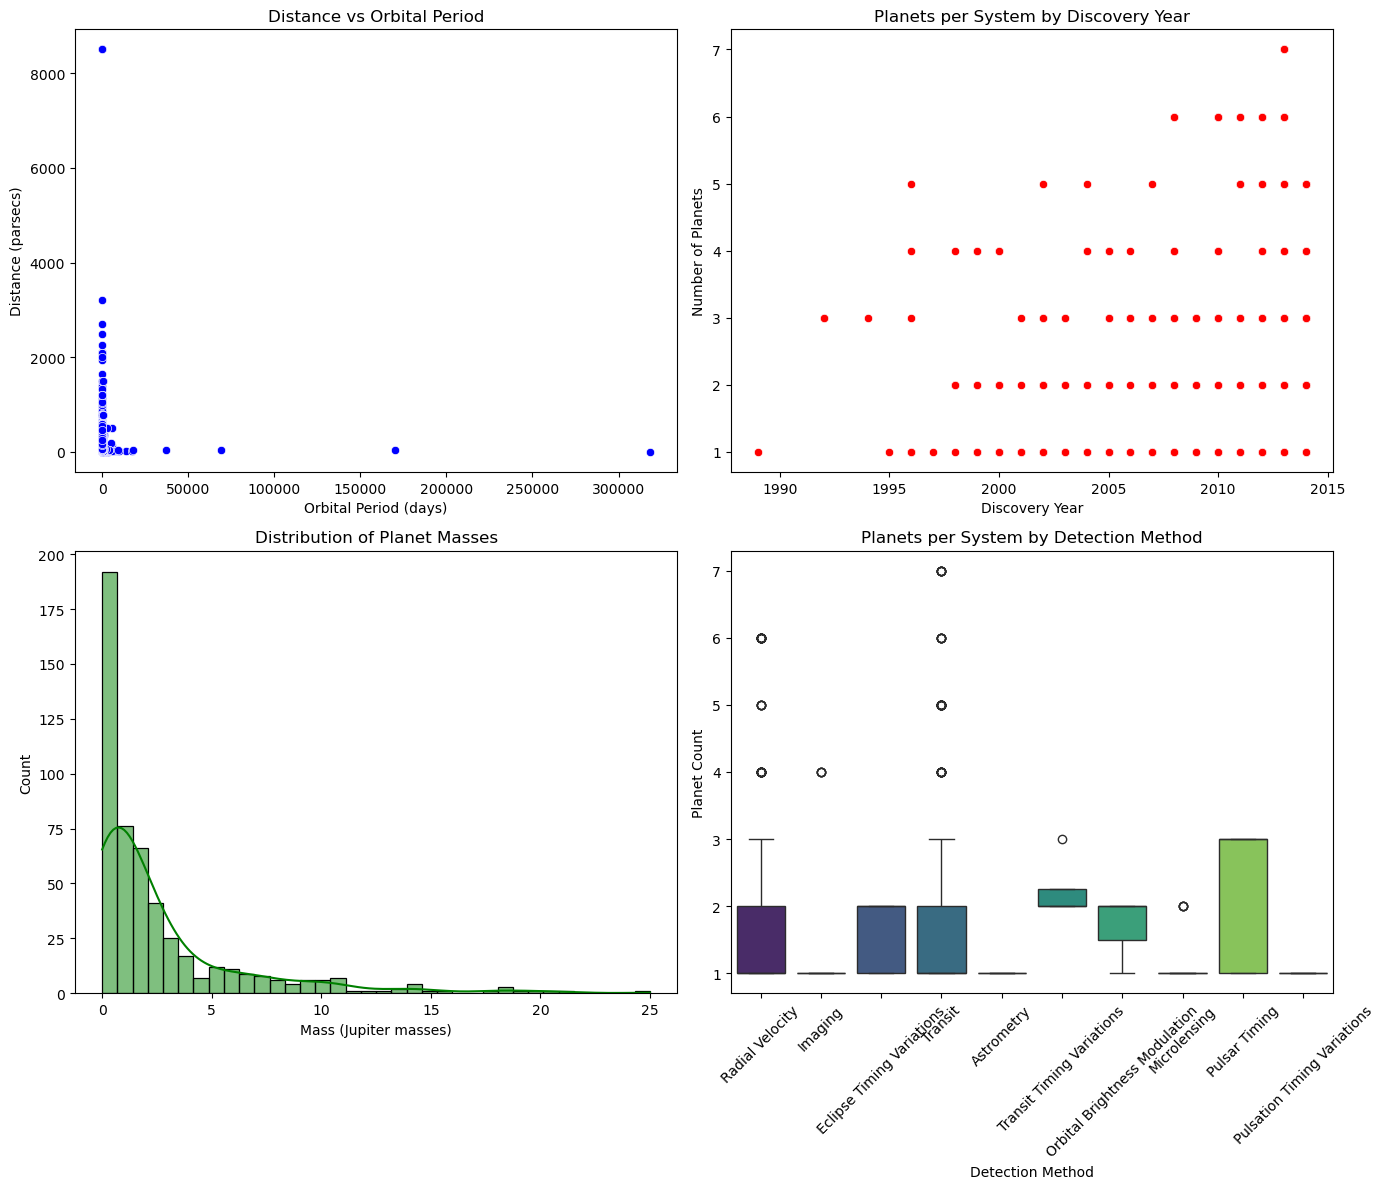

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))


sns.scatterplot(data=df, x="orbital_period", y="distance", ax=axes[0,0], color="blue")
axes[0,0].set_title("Distance vs Orbital Period")
axes[0,0].set_xlabel("Orbital Period (days)")
axes[0,0].set_ylabel("Distance (parsecs)")


sns.scatterplot(data=df, x="year", y="number", ax=axes[0,1], color="red")
axes[0,1].set_title("Planets per System by Discovery Year")
axes[0,1].set_xlabel("Discovery Year")
axes[0,1].set_ylabel("Number of Planets")


sns.histplot(df["mass"], ax=axes[1,0], kde=True, color="green")
axes[1,0].set_title("Distribution of Planet Masses")
axes[1,0].set_xlabel("Mass (Jupiter masses)")
axes[1,0].set_ylabel("Count")


sns.boxplot(data=df, x="method", y="number", ax=axes[1,1], palette="viridis")
axes[1,1].set_title("Planets per System by Detection Method")
axes[1,1].set_xlabel("Detection Method")
axes[1,1].set_ylabel("Planet Count")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [28]:
#9 Explain
#The scatterplot on the top left corner is represnting the exoplanet data  as how far they were found from earth vs. orbital period. In this chart I learned from visual analysis that exoplanets with shorter orbital periods are dteected more often or easily. Also that the distance of when they are discovered varoies quite a bit. 

#The top right plot is showing the data as the year they were discovered by single and multi planet systems. It shows that discovery rates were highest after 20000 likley due to technological advnacements or scinetific efforts.

#The histogram on the bottom left is the distribution of exoplanet masses. As you can see the right of the mass is quite skewed so many planets discovered are on the smaller mass side but with large varity in masses as a whole.

#The bottom right graph is boxplot showing different detection methods vs. the number of planets found using that system. By looking at the graph it is evident transit and radial velocity are the most effective detection techniques but some other ones like transit find miltiple planet systems comparitevily. 
#Overall teh graphs did not require a lob based ten function as they can be analyzed fine without it.